# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [94]:
from commonfunctions import *
import numpy as np
import cv2 as cv
import scipy.ndimage as sp
import scipy.signal as sig 
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

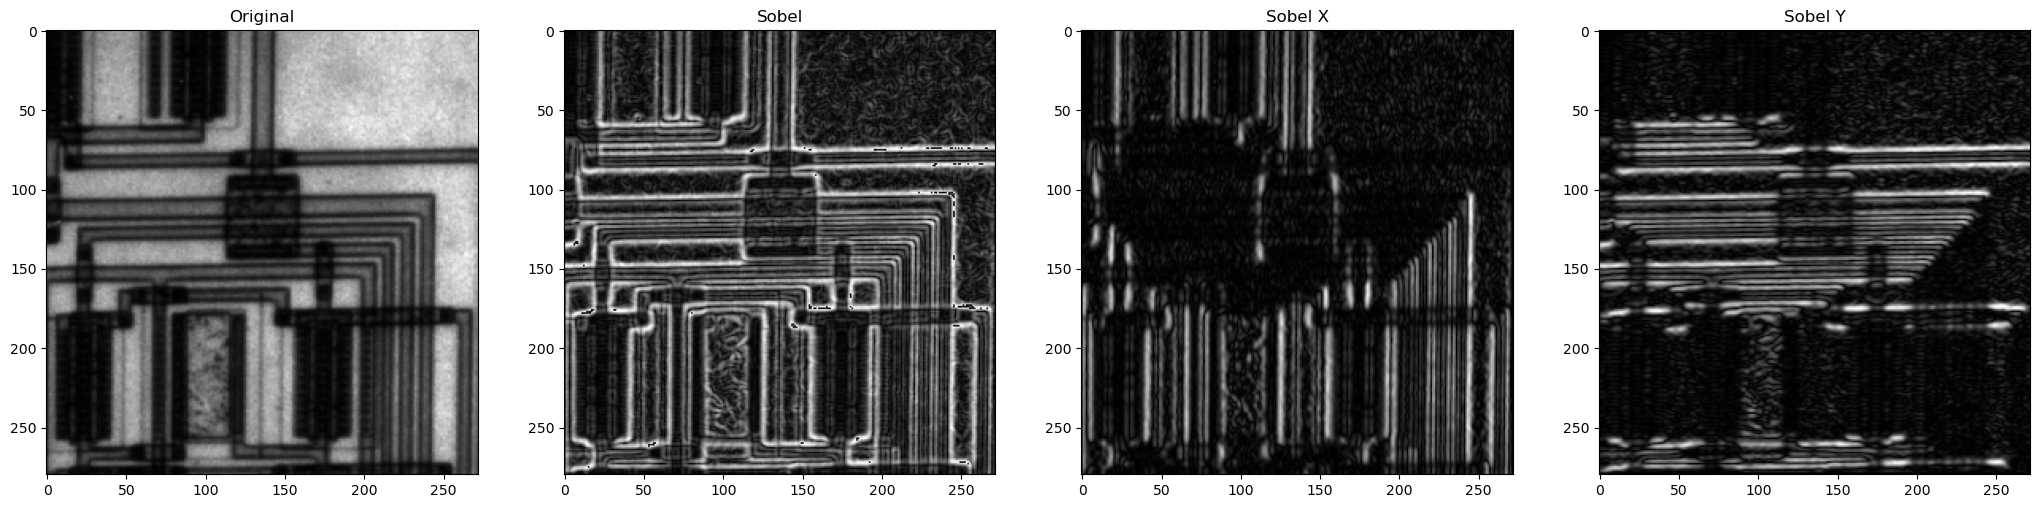

In [96]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

image =io.imread('./circuit.tif')


sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=5)
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=5)
abs_sobel_x = cv.convertScaleAbs(sobel_x, alpha=255/sobel_x.max())
# convertScaleAbs scaling, taking an absolute value, conversion to an unsigned 8-bit type:

abs_sobel_y = cv.convertScaleAbs(sobel_y, alpha=255/sobel_y.max())
sobel= abs_sobel_x + abs_sobel_y

show_images([image, sobel, abs_sobel_x, abs_sobel_y], ['Original', 'Sobel', 'Sobel X', 'Sobel Y'])



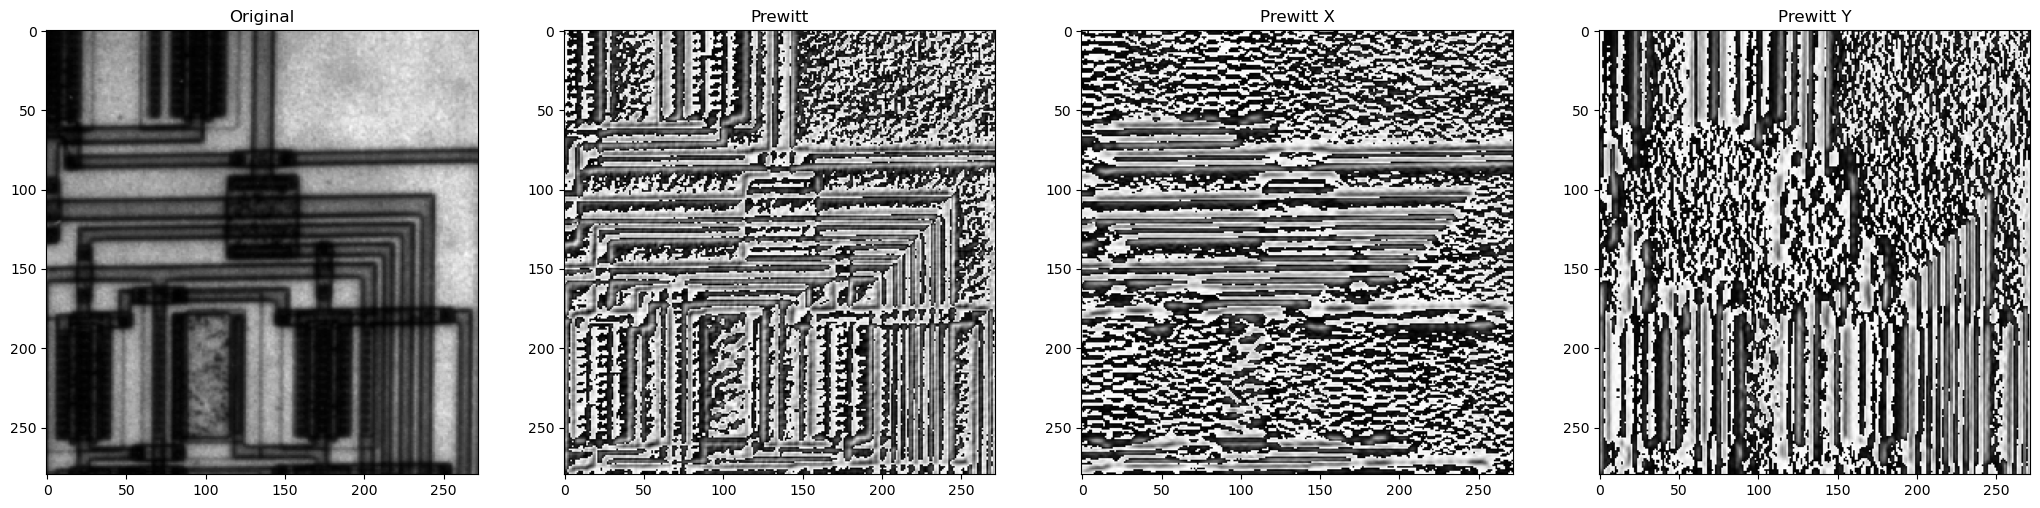

In [97]:
# builtin Prewitt
prewitt_x = sp.prewitt(image, axis=0)
prewitt_y = sp.prewitt(image, axis=1)

abs_prewitt_x = cv.convertScaleAbs(prewitt_x, alpha=255/prewitt_x.max())
abs_prewitt_y = cv.convertScaleAbs(prewitt_y, alpha=255/prewitt_y.max())

prewitt = abs_prewitt_x + abs_prewitt_y
show_images([image, prewitt, prewitt_x, prewitt_y], ['Original', 'Prewitt', 'Prewitt X', 'Prewitt Y'])

In [98]:
#built in Roberts
#???/

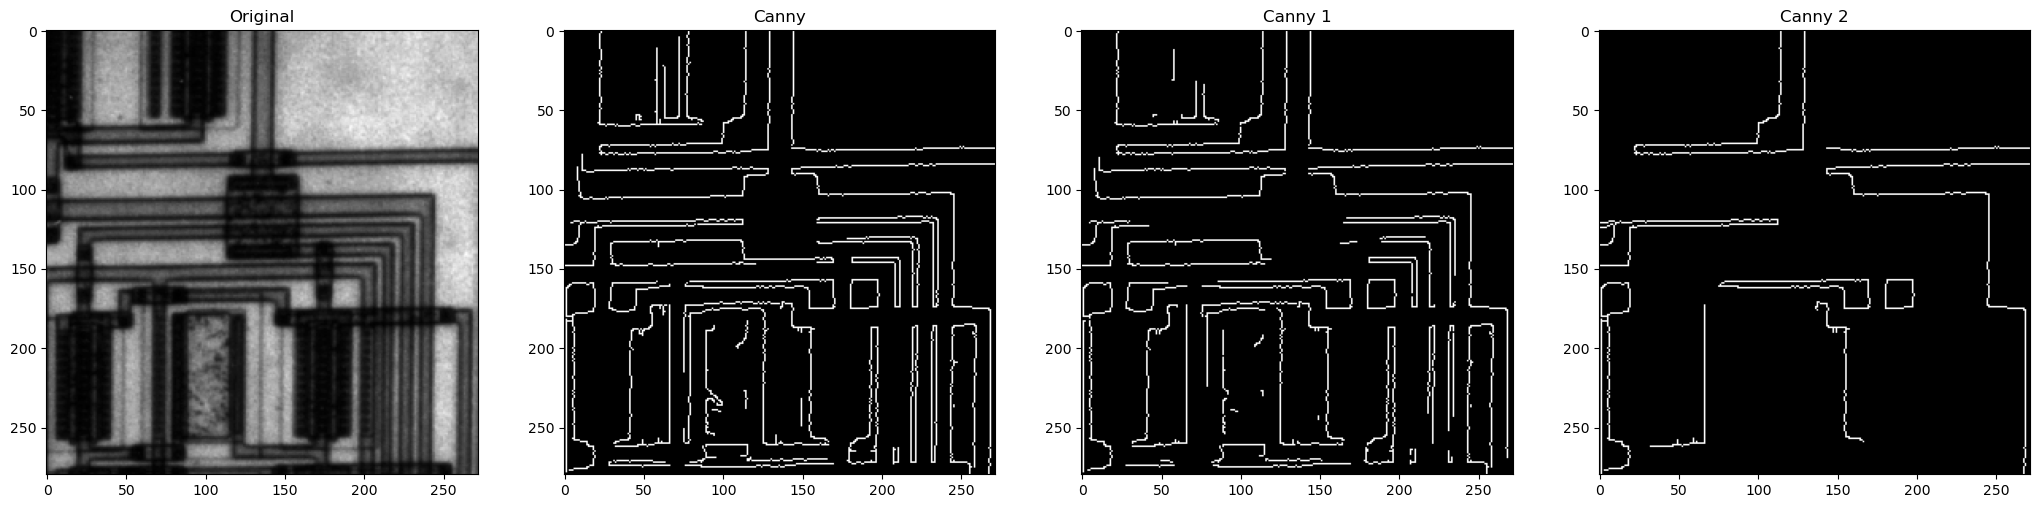

In [99]:
#builtin Canny
canny = cv.Canny(image, 110, 200) #best so bfar 
canny_1 = cv.Canny(image, 145, 200)
canny_2 = cv.Canny(image, 100, 300)
show_images([image, canny, canny_1, canny_2], ['Original', 'Canny', 'Canny 1', 'Canny 2'])

In [112]:
def convolution(image, kernel, threshold=0):
    kernel_width, kernel_height = kernel.shape
    image_width, image_height = image.shape

    output_width = image_width - kernel_width + 1
    output_height = image_height - kernel_height + 1
    output = np.zeros((output_width, output_height))

    for i in range(output_width):
        for j in range(output_height):
            region = image[i:i + kernel_width, j:j + kernel_height]
            val= np.sum(region * kernel)
            if val > threshold:
                output[i,j] = val
    return output

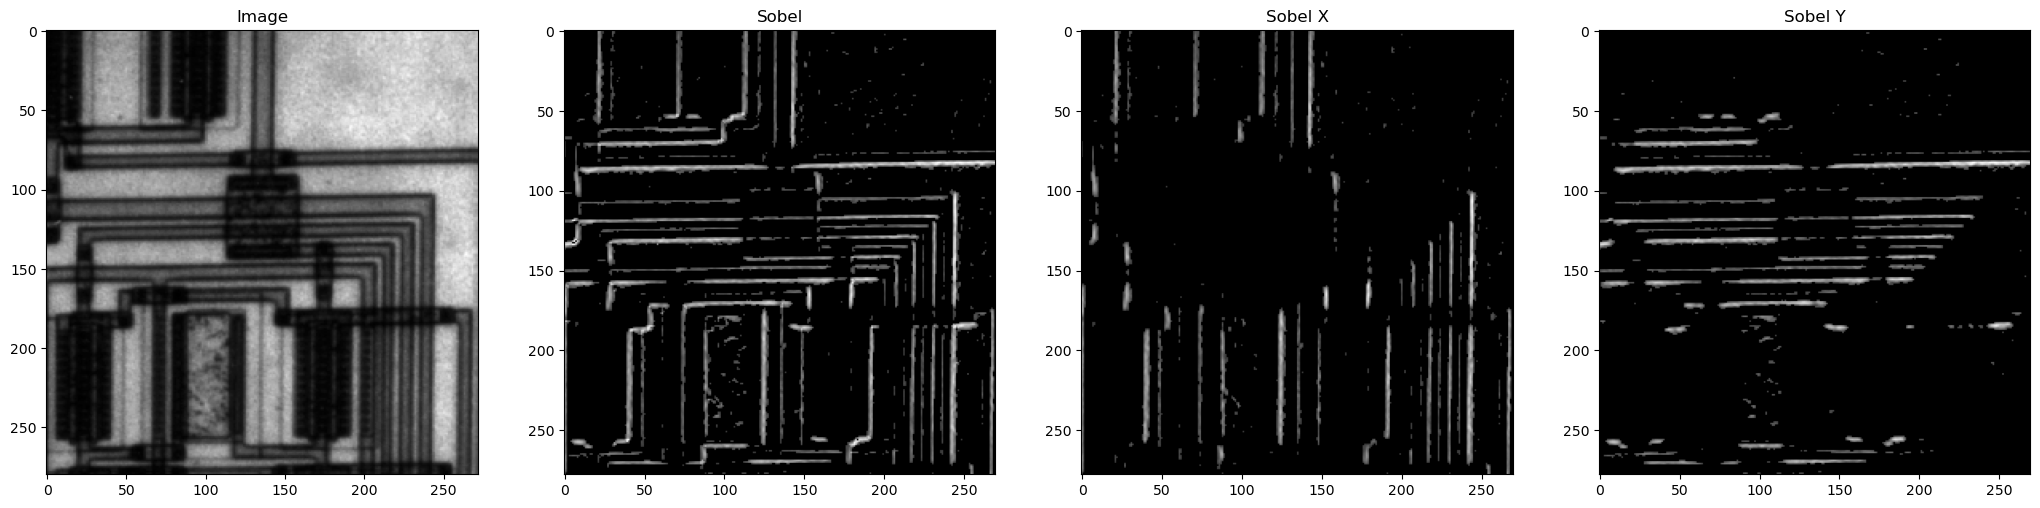

In [113]:
# 2. Custom Sobel (V-H-Both)

sobel_x_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_filter =np.array([[-1, -2, -1], [0,0,0], [1,2,1]])




sobel_x_custom = convolution(image, sobel_x_filter,70)
sobel_y_custom = convolution(image, sobel_y_filter, 70)
abs_sobel_x_custom = cv.convertScaleAbs(sobel_x_custom, alpha=255/sobel_x_custom.max())
abs_sobel_y_custom = cv.convertScaleAbs(sobel_y_custom, alpha=255/sobel_y_custom.max())

sobel_custom = abs_sobel_x_custom + abs_sobel_y_custom
show_images([image, sobel_custom, abs_sobel_x_custom, abs_sobel_y_custom], ['Image', 'Sobel', 'Sobel X', 'Sobel Y'])


In [114]:
# 3. Custom LoG
thres= 20


In [115]:



def gaussian_filter(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * 
                     np.exp(-((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    ) # x and y are distances from kernel center
    return kernel


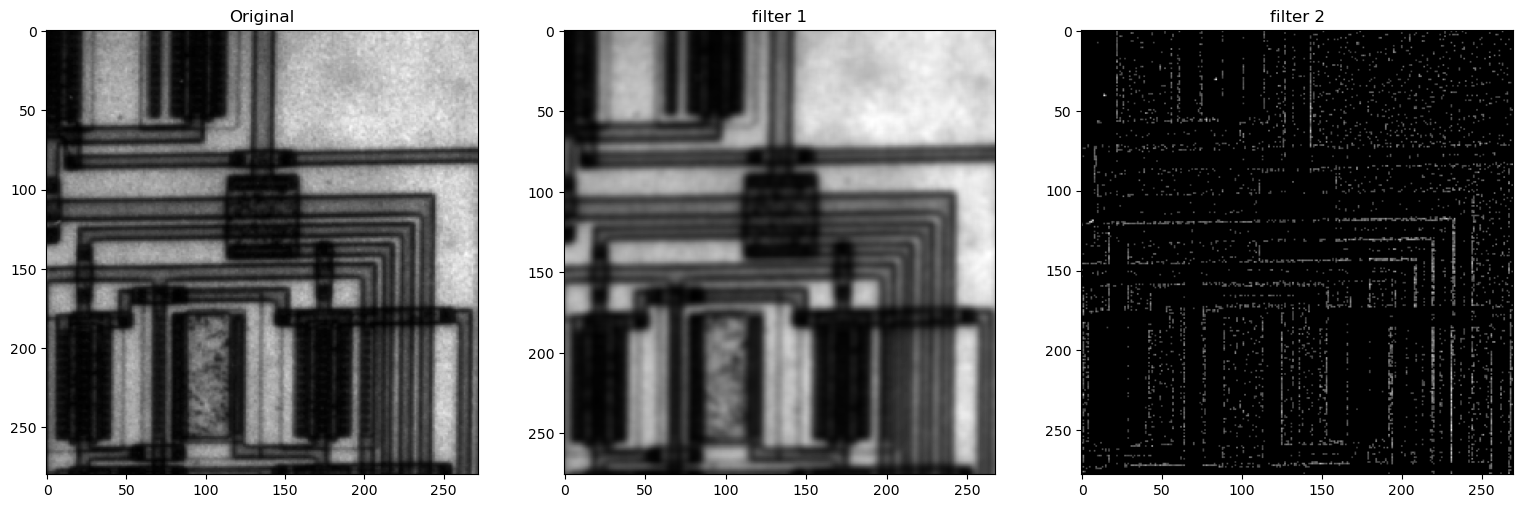

In [124]:

kernel = gaussian_filter(5, 5)
smooth_image = convolution(image, kernel)

laplacian_filter_1 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
laplacian_filter_2 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
second_derivative_1 = convolution(image, laplacian_filter_1,50)
second_derivative_2= convolution(image, laplacian_filter_2,20)
show_images([image, smooth_image, second_derivative_1, second_derivative_2], ['Original', 'filter 1', 'filter 2'])


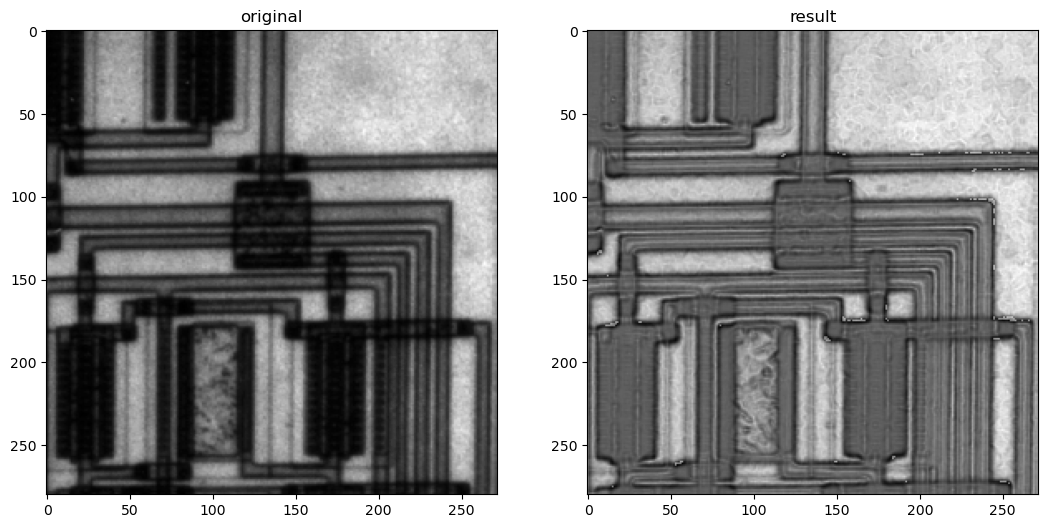

In [126]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''
mul_image = sobel * 0.5
res = image - mul_image 
show_images([image, res], ['original', 'result'])